# Homeostasis à-la-SparseNet on the activation probability

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [2]:
from shl_scripts.shl_experiments import SHL

DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 7
tag = 'nohomeo'

opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method='None',
              learning_algorithm='mp', verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')
list_figures = ['show_dico', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']

Extracting data..loading the data called : data_cache/data_data
Data is of shape : (81920, 576) - done in 0.30s.


## With diferent learning rates but without homeostasis

Here,we only ensure the norm ofthe filters is constant.

loading the dico called : data_cache/nohomeo - eta=0.001_dico.pkl
loading the code called : data_cache/nohomeo - eta=0.001_coding.npy
loading the code called : data_cache/nohomeo - eta=0.001_coding.npy


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


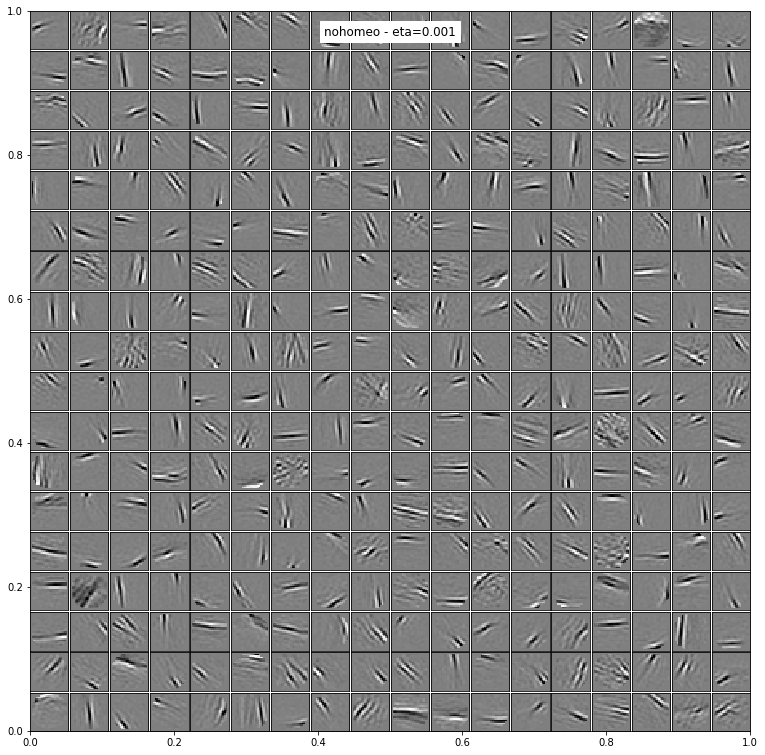

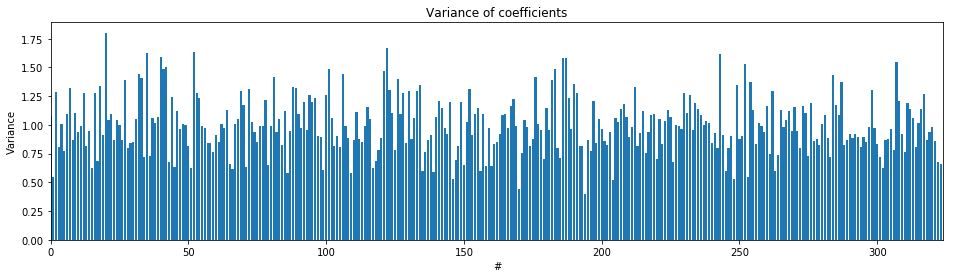

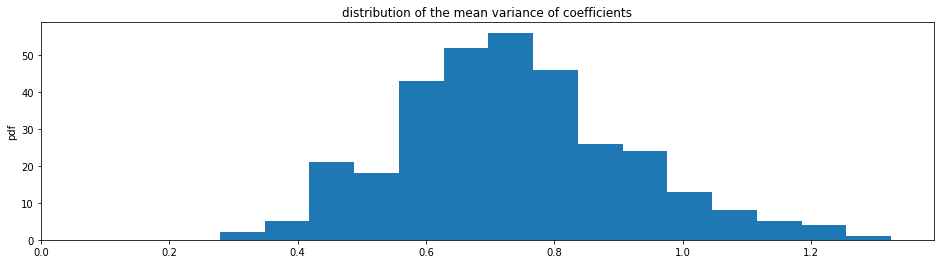

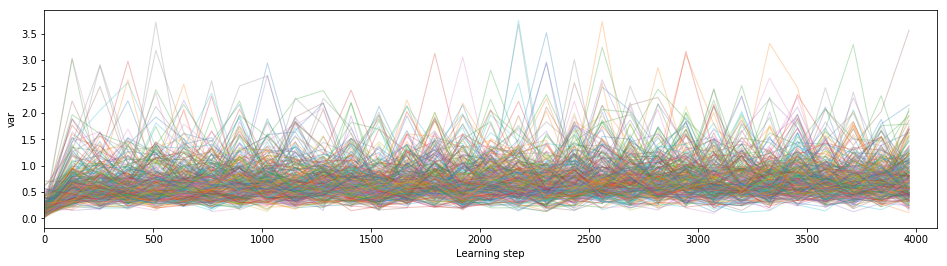

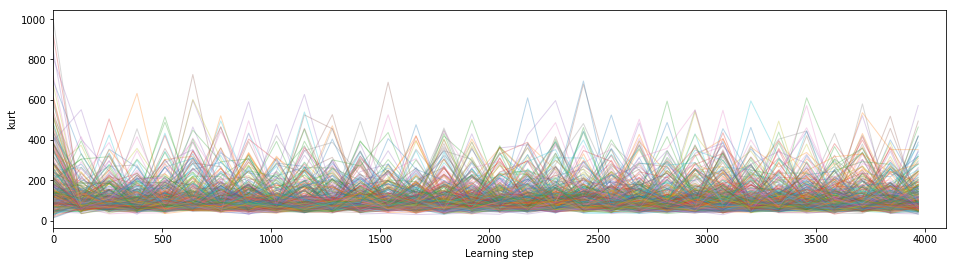

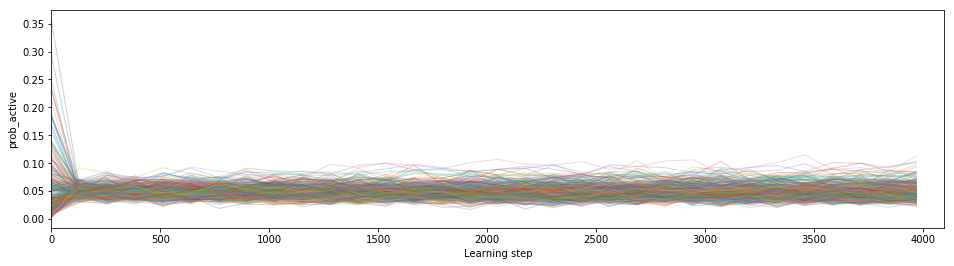

loading the dico called : data_cache/nohomeo - eta=0.0021544346900318834_dico.pkl
loading the code called : data_cache/nohomeo - eta=0.0021544346900318834_coding.npy
loading the code called : data_cache/nohomeo - eta=0.0021544346900318834_coding.npy


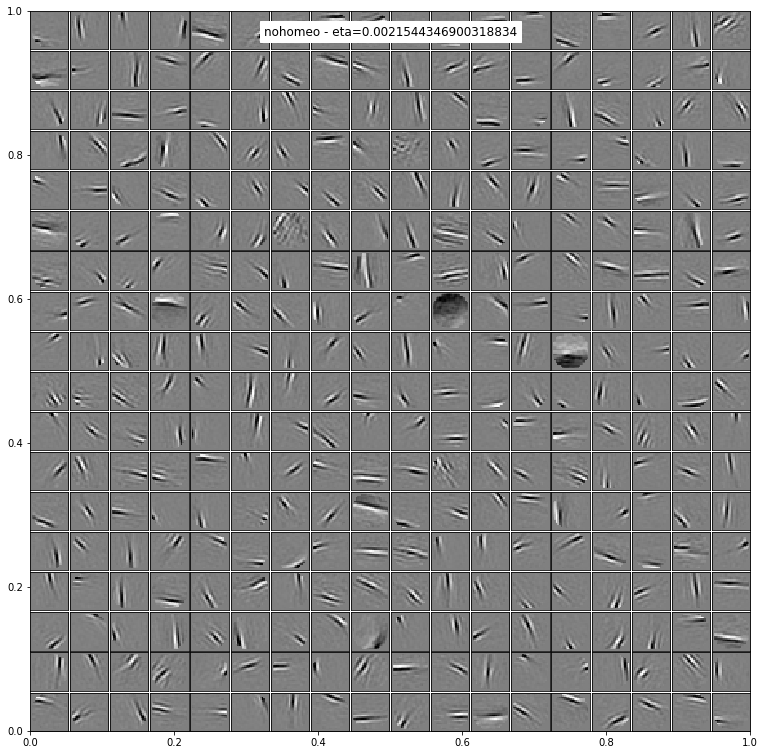

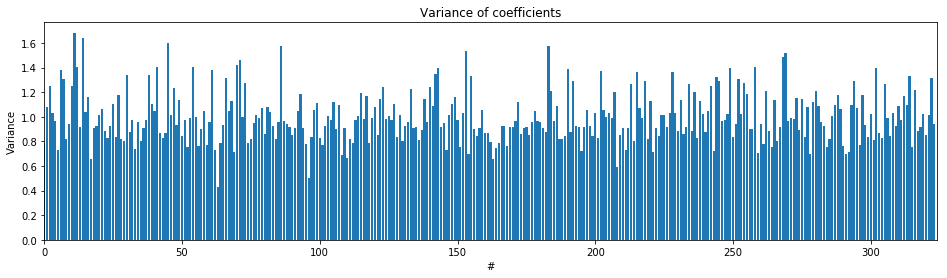

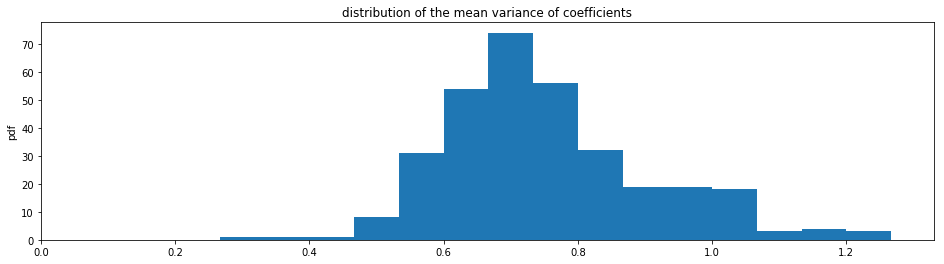

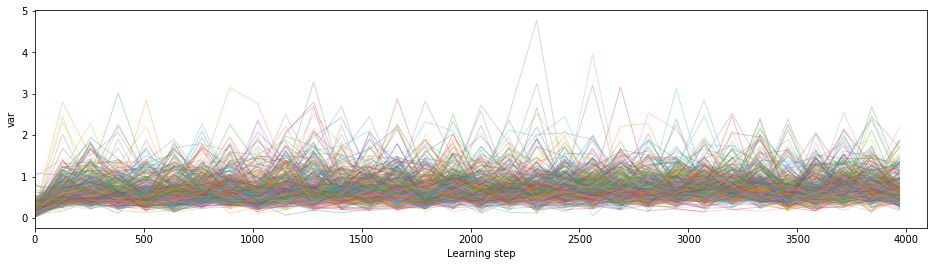

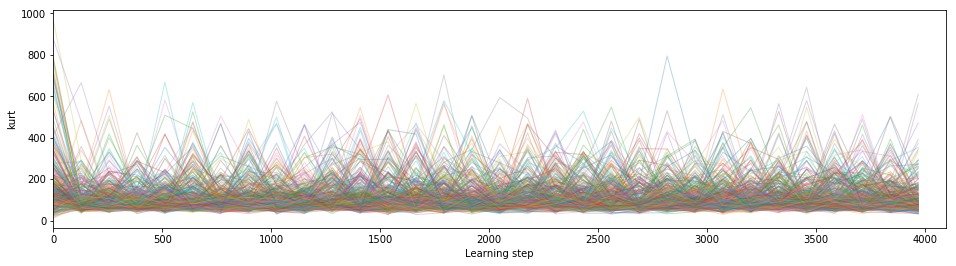

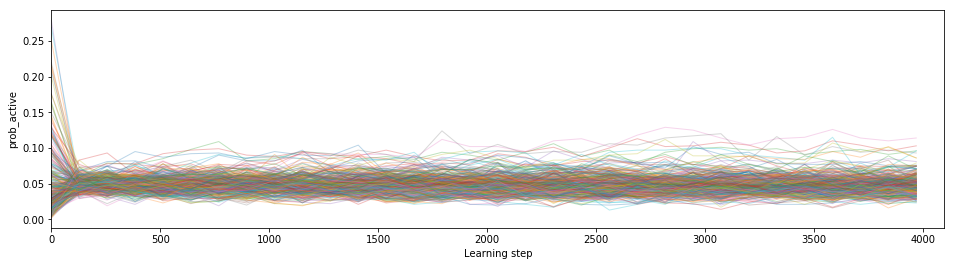

loading the dico called : data_cache/nohomeo - eta=0.004641588833612779_dico.pkl
loading the code called : data_cache/nohomeo - eta=0.004641588833612779_coding.npy
loading the code called : data_cache/nohomeo - eta=0.004641588833612779_coding.npy


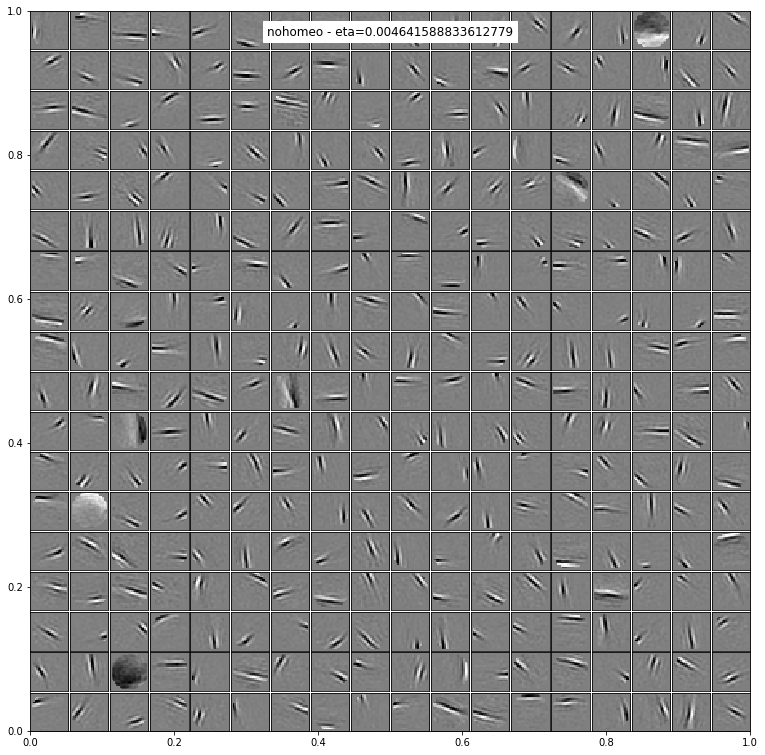

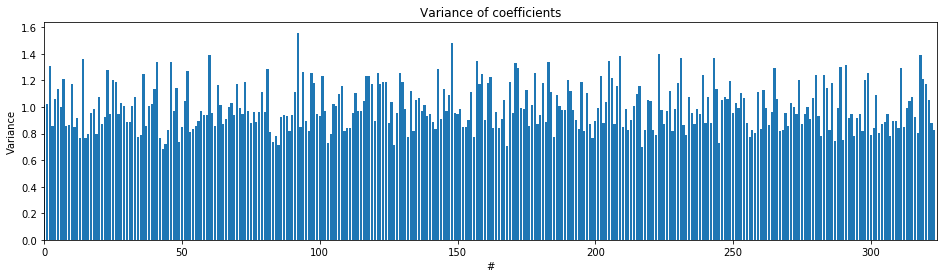

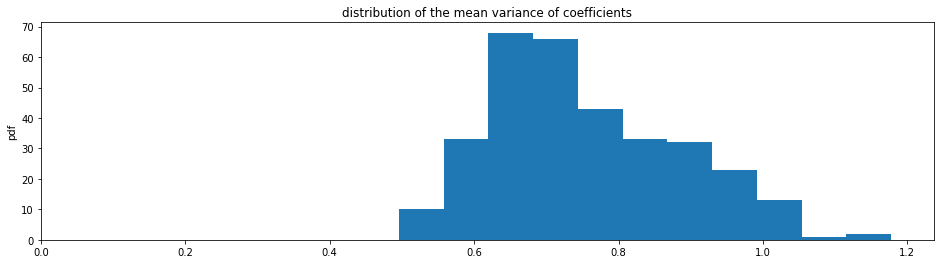

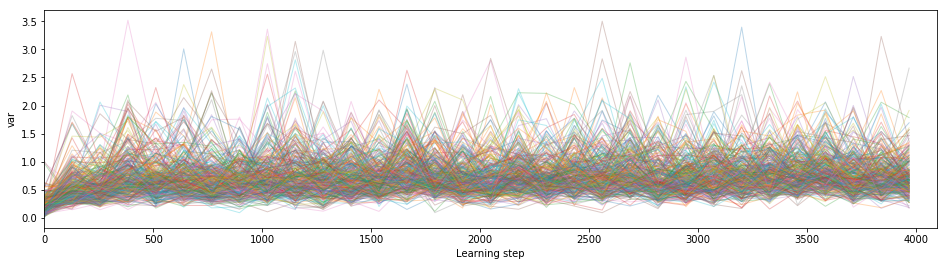

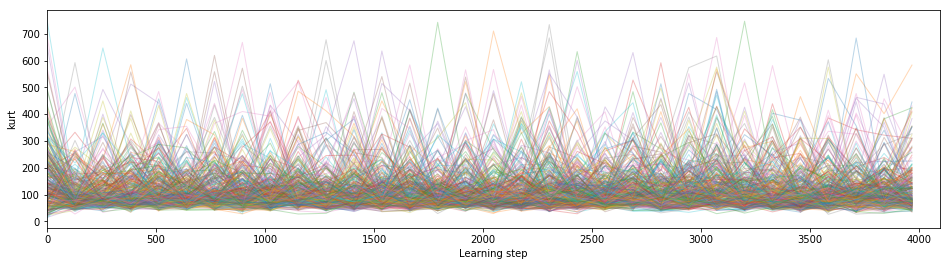

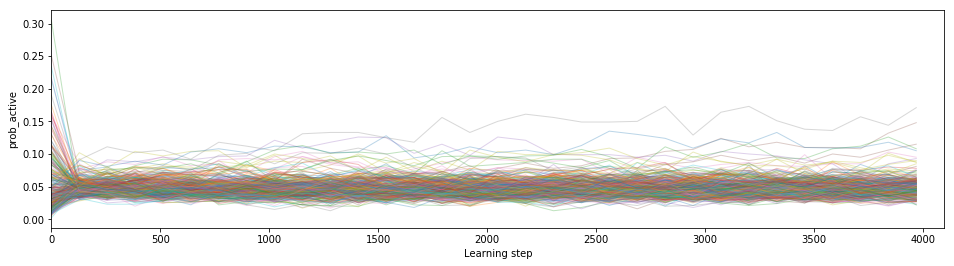

loading the dico called : data_cache/nohomeo - eta=0.01_dico.pkl
loading the code called : data_cache/nohomeo - eta=0.01_coding.npy
loading the code called : data_cache/nohomeo - eta=0.01_coding.npy


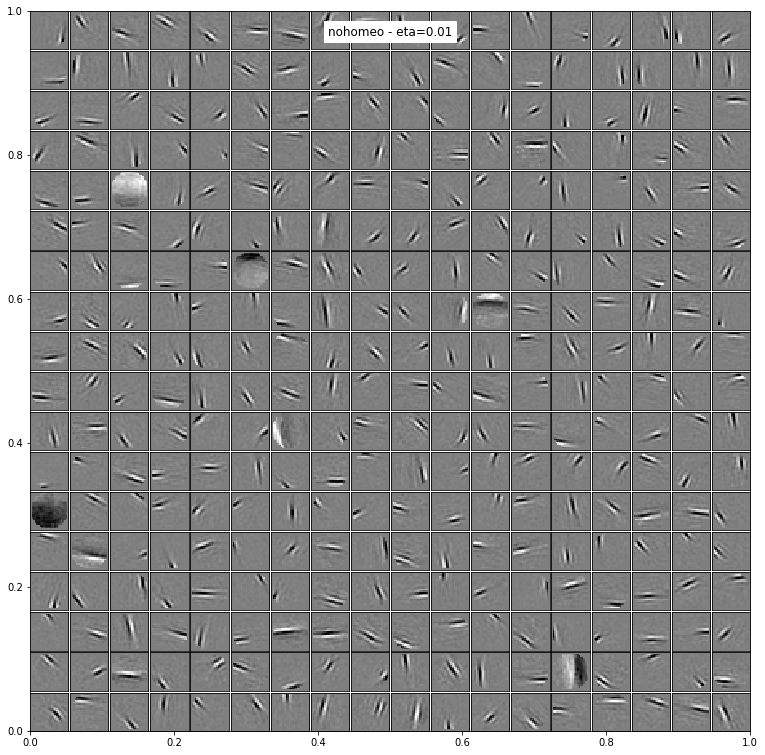

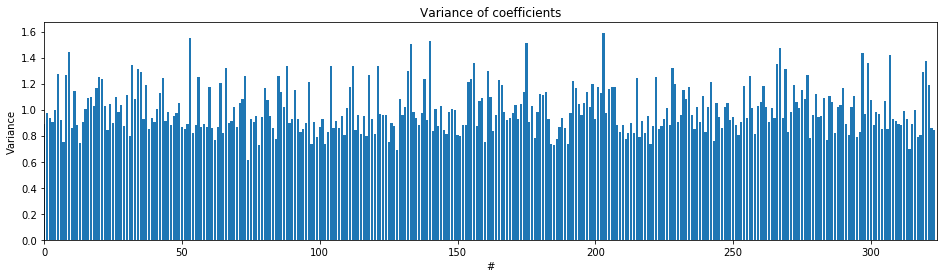

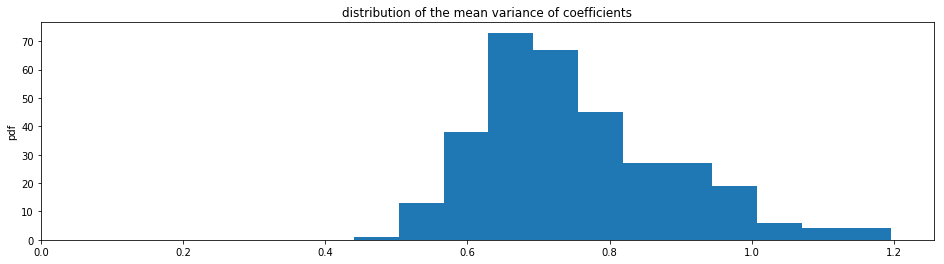

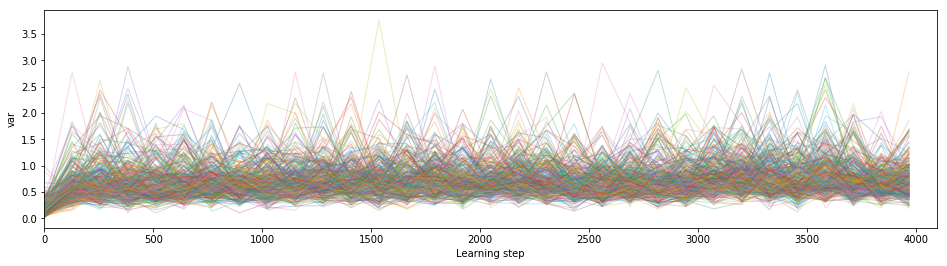

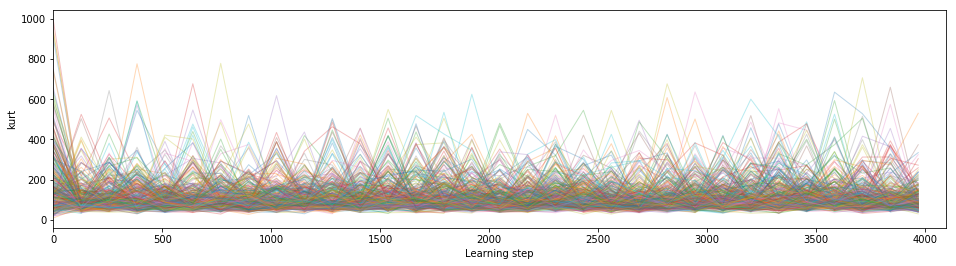

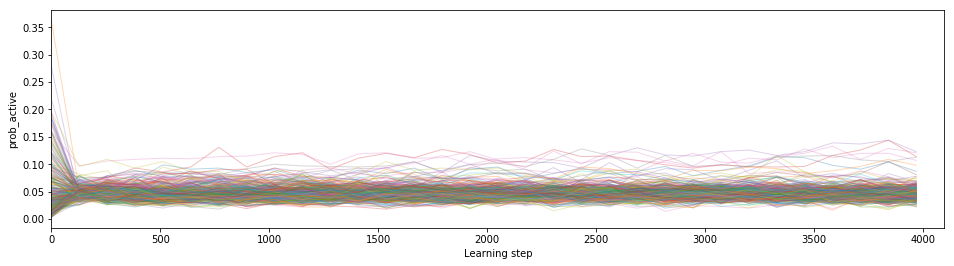

loading the dico called : data_cache/nohomeo - eta=0.021544346900318836_dico.pkl
loading the code called : data_cache/nohomeo - eta=0.021544346900318836_coding.npy
loading the code called : data_cache/nohomeo - eta=0.021544346900318836_coding.npy


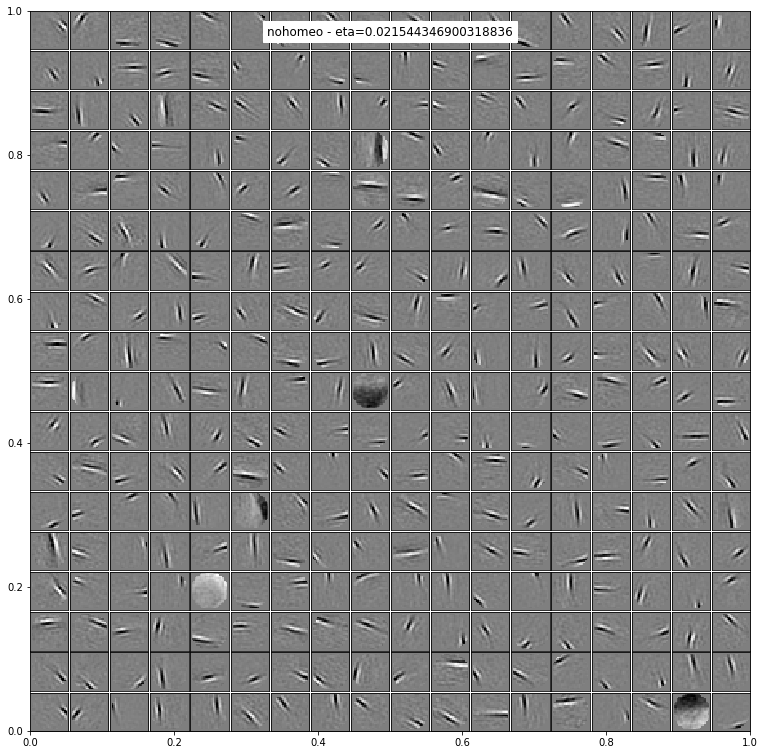

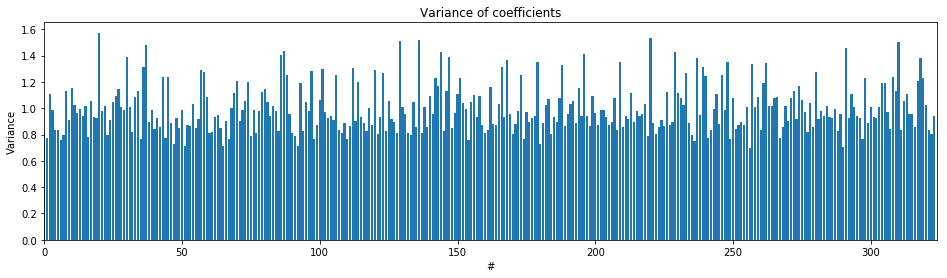

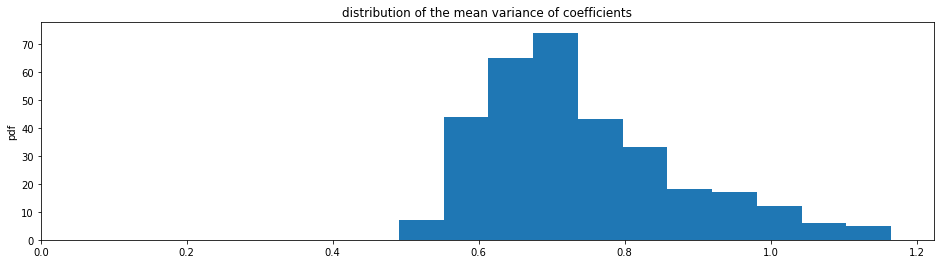

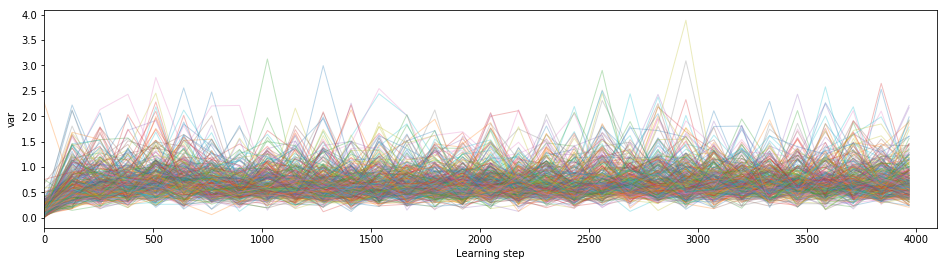

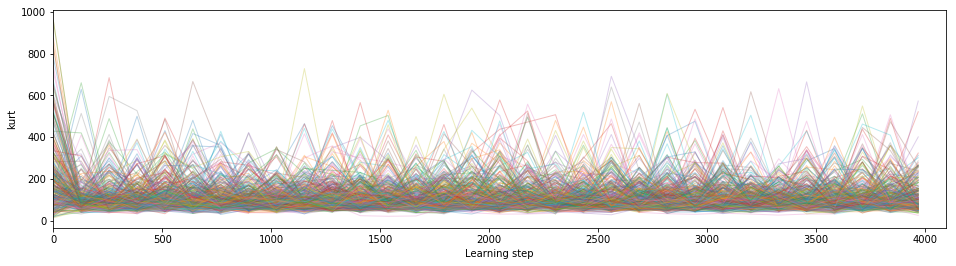

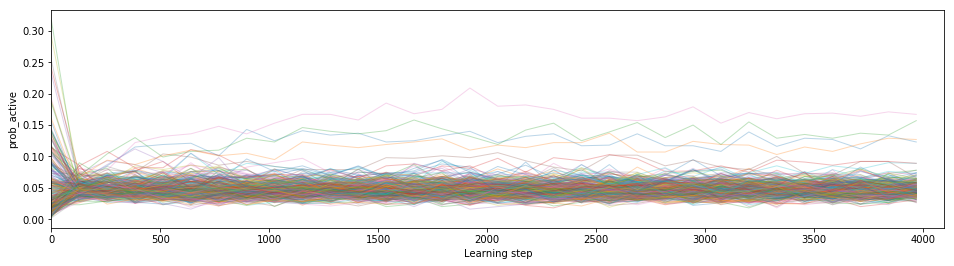

loading the dico called : data_cache/nohomeo - eta=0.046415888336127774_dico.pkl
loading the code called : data_cache/nohomeo - eta=0.046415888336127774_coding.npy
loading the code called : data_cache/nohomeo - eta=0.046415888336127774_coding.npy


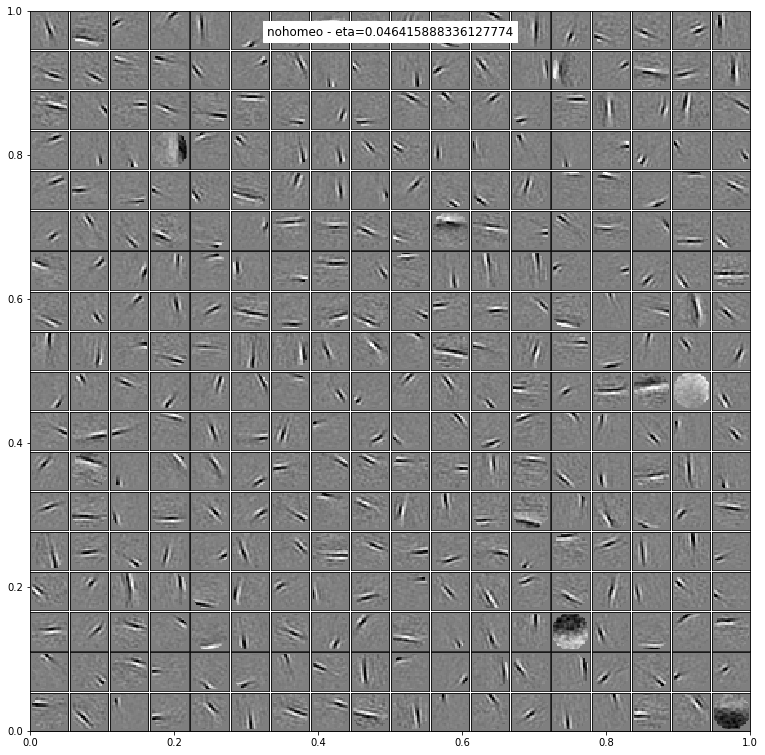

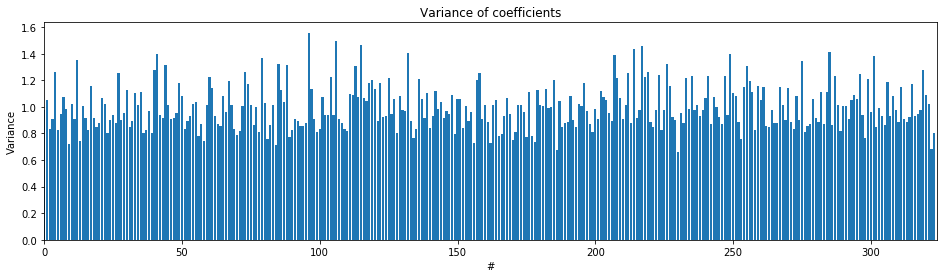

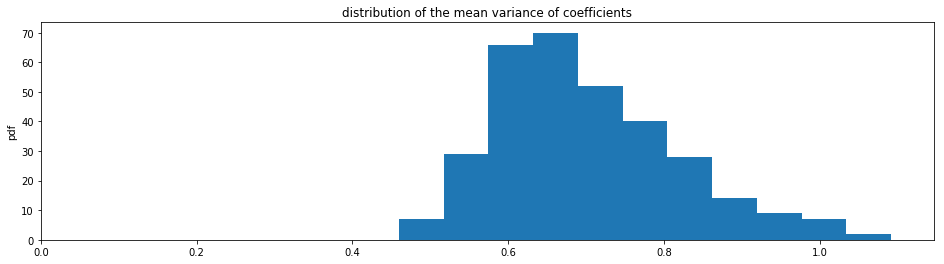

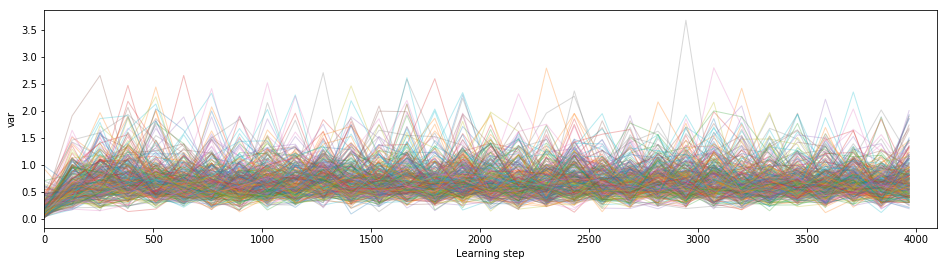

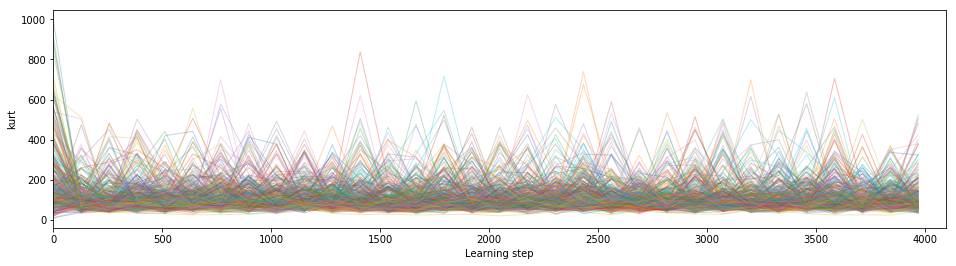

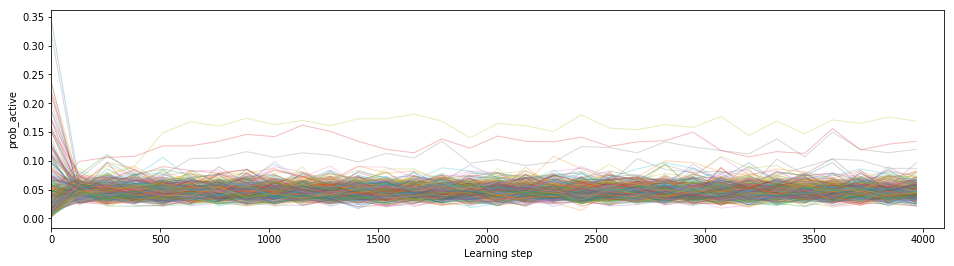

loading the dico called : data_cache/nohomeo - eta=0.1_dico.pkl
loading the code called : data_cache/nohomeo - eta=0.1_coding.npy
loading the code called : data_cache/nohomeo - eta=0.1_coding.npy


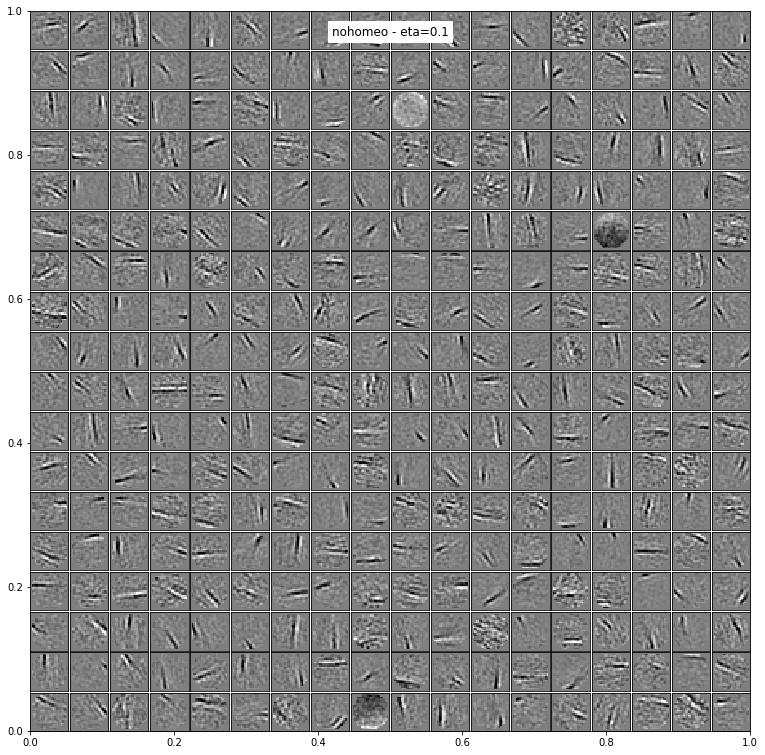

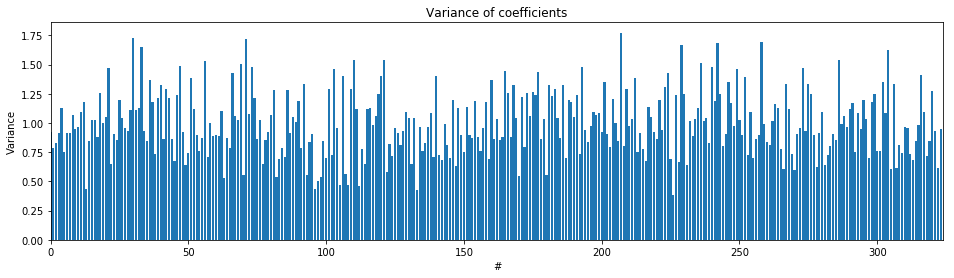

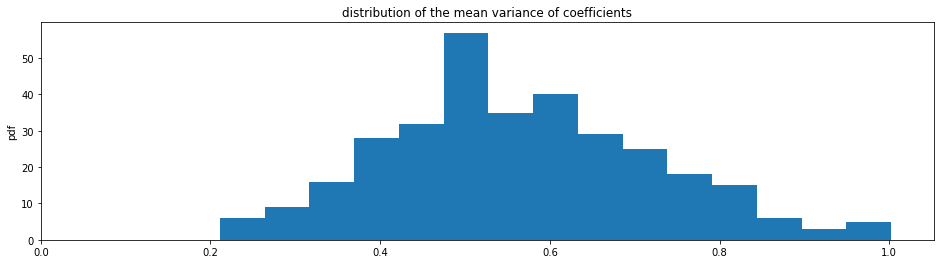

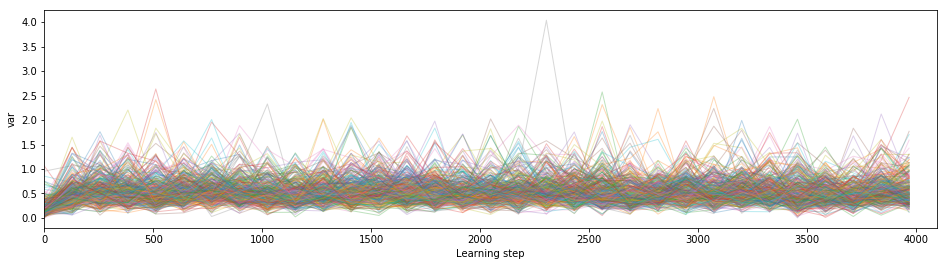

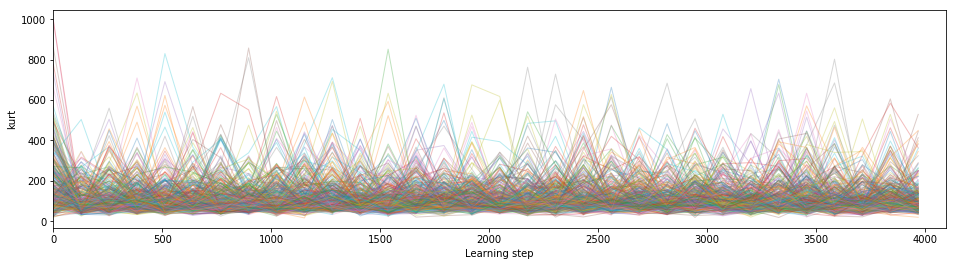

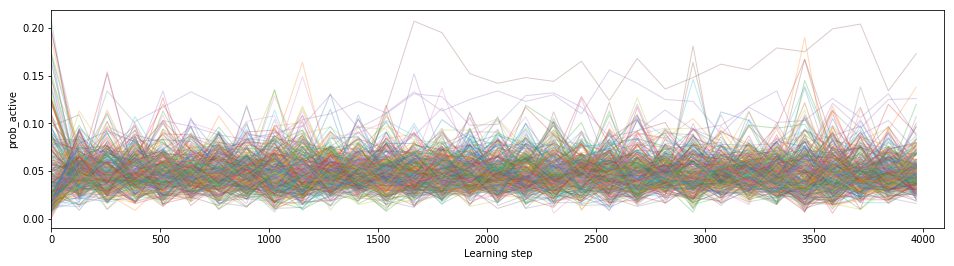

In [3]:
eta = SHL(**opts).eta
for alpha in np.logspace(-1, 1, N_scan, base=10)*eta['alpha']:
    matname = tag + ' - alpha={}'.format(alpha)
    eta.update(alpha=alpha)
    shl = SHL(eta=eta, **opts)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)    
    plt.show()    

## Version used

In [4]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.3.0 x86_64 i386 64bit
numpy 1.14.0
shl_scripts 20171221
Wed Jan 10 17:56:15 2018 CET